Dataset Shape: (442, 11)

Missing Values per Column:
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

Data Types:
AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object


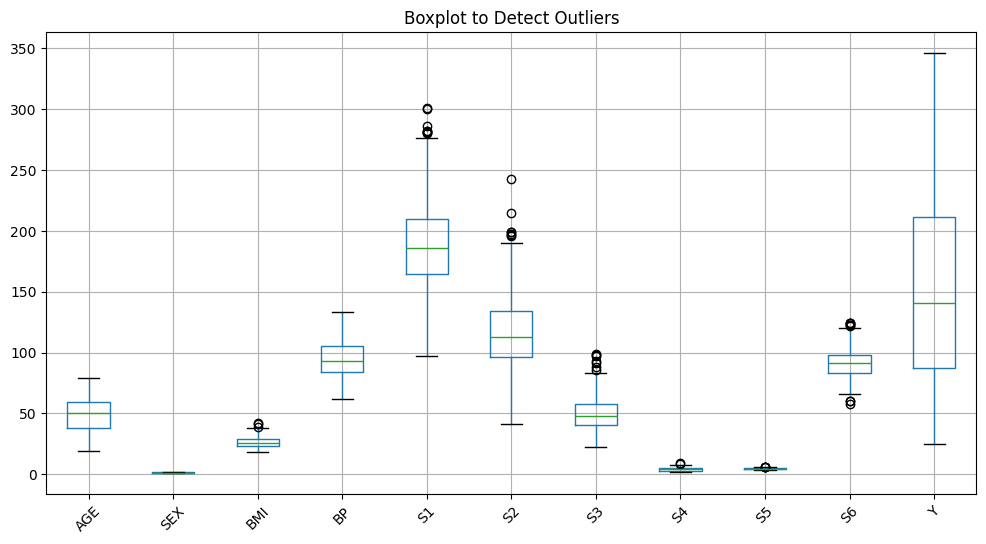


Outliers in Each Column:

Outliers in BMI:
[41.3, 39.1, 42.2]

Outliers in S1:
[300, 286, 281, 301, 282, 280, 280, 282]

Outliers in S2:
[242.4, 199.4, 215.0, 197.2, 195.4, 196.8, 198.6]

Outliers in S3:
[86.0, 99.0, 91.0, 98.0, 93.0, 88.0, 97.0]

Outliers in S4:
[9.09, 8.28]

Outliers in S5:
[6.107, 6.107, 6.1048, 6.0936]

Outliers in S6:
[124, 60, 124, 123, 122, 60, 124, 58, 123]

 ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

Feature Correlation Matrix:
          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.89666

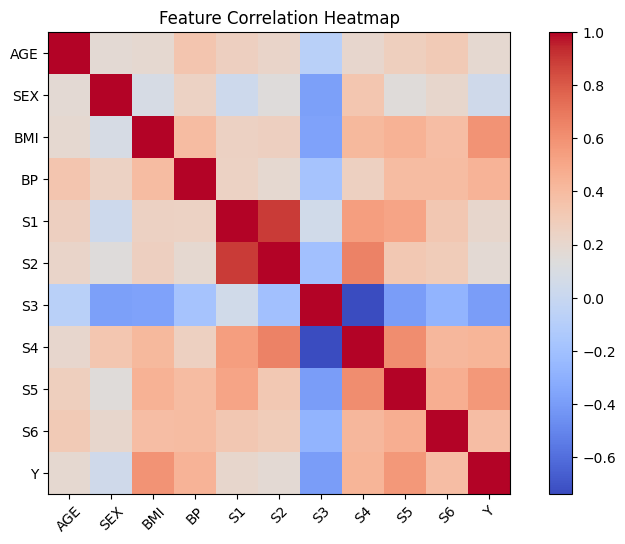


Feature Importance based on Correlation with Y:
Y      1.000000
BMI    0.586450
S5     0.565883
BP     0.441482
S4     0.430453
S6     0.382483
S1     0.212022
AGE    0.187889
S2     0.174054
SEX    0.043062
S3    -0.394789
Name: Y, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           3.83e-62
Time:                        12:04:32   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust   

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = "diabetes.data.txt"
df = pd.read_csv(file_path, sep=r'\s+', header=0)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print basic dataset info
print("Dataset Shape:", df.shape)
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Data types of columns
print("\nData Types:")
print(df.dtypes)

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.show()

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Identify outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Print outlier values per column
print("\nOutliers in Each Column:")
for column in df.columns:
    outlier_values = df[column][outliers[column]]
    if not outlier_values.empty:
        print(f"\nOutliers in {column}:")
        print(outlier_values.to_list())

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric Columns:", numeric_cols)

# Compute correlation matrix
corr_matrix = df.corr()
print("\nFeature Correlation Matrix:")
print(corr_matrix)

# Heatmap for feature correlation
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature importance using correlation with target variable 'Y'
if 'Y' in df.columns:
    correlation_with_target = df.corr()["Y"].sort_values(ascending=False)
    print("\nFeature Importance based on Correlation with Y:")
    print(correlation_with_target)
else:
    print("\nTarget variable 'Y' not found in dataset.")

# Feature importance using OLS regression
X = df.drop('Y', axis=1)
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [1]:
 %pip install seaborn